# Data visualization assignment

In [85]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [86]:
iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'



In [87]:
df = pd.read_csv(iris, sep=',')




In [117]:
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target"]
df.columns = attributes



In [135]:
X = df.iloc[:,:-1].values

In [134]:
y = df.iloc[:,4].values



In [124]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X = pca.fit_transform(X)
components = pd.DataFrame(data=X,columns= ['components1','components2','components3'])


In [137]:
finalDf = pd.concat([components, df[['target']]], axis = 1)


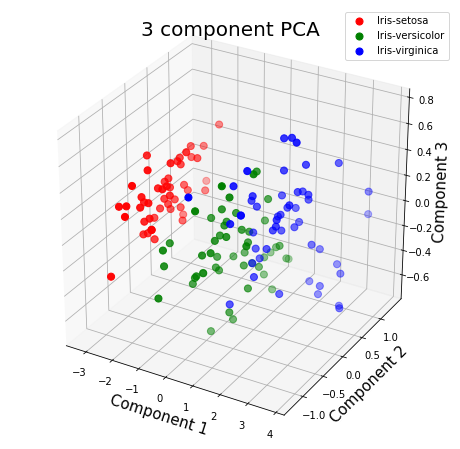

In [138]:

# Create the figure
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_zlabel('Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'components1']
               , finalDf.loc[indicesToKeep, 'components2']
               , finalDf.loc[indicesToKeep, 'components3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()
